In [1]:
import pandas as pd
import numpy as np
from numpy import cov
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('data/weatherHistory.csv')
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20,16.1000,0,1015.95,Partly cloudy starting in the morning.


In [2]:
df = df.rename(columns = {"Formatted Date":"FORMATTED_DATE","Summary":"SUMMARY","Precip Type":"PRECIP_TYPE","Temperature (C)":"TEMPERATURE(C)","Apparent Temperature (C)":"APPARENT TEMPERATURE(C)","Humidity":"HUMIDITY","Wind Speed (km/h)":"WIND_SPEED(km/h)","Wind Bearing (degrees)":"WIND_BEARING(degrees)","Visibility (km)":"VISIBILITY(km)","Loud Cover":"LOUD_COVER","Pressure (millibars)":"PRESSURE(millibars)","Daily Summary":"DAILY_SUMMARY"})
df

,FORMATTED_DATE,SUMMARY,PRECIP_TYPE,TEMPERATURE(C),APPARENT TEMPERATURE(C),HUMIDITY,WIND_SPEED(km/h),WIND_BEARING(degrees),VISIBILITY(km),LOUD_COVER,PRESSURE(millibars),DAILY_SUMMARY
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20,16.1000,0,1015.95,Partly cloudy starting in the morning.


In [3]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df

,FORMATTED_DATE,SUMMARY,PRECIP_TYPE,TEMPERATURE(C),APPARENT TEMPERATURE(C),HUMIDITY,WIND_SPEED(km/h),WIND_BEARING(degrees),VISIBILITY(km),LOUD_COVER,PRESSURE(millibars),DAILY_SUMMARY
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20,16.1000,0,1015.95,Partly cloudy starting in the morning.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   FORMATTED_DATE           96453 non-null  object 
 1   SUMMARY                  96453 non-null  object 
 2   PRECIP_TYPE              95936 non-null  object 
 3   TEMPERATURE(C)           96453 non-null  float64
 4   APPARENT TEMPERATURE(C)  96453 non-null  float64
 5   HUMIDITY                 96453 non-null  float64
 6   WIND_SPEED(km/h)         96453 non-null  float64
 7   WIND_BEARING(degrees)    96453 non-null  int64  
 8   VISIBILITY(km)           96453 non-null  float64
 9   LOUD_COVER               96453 non-null  int64  
 10  PRESSURE(millibars)      96453 non-null  float64
 11  DAILY_SUMMARY            96453 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 8.8+ MB


In [5]:
df.describe(include=['object'])

,FORMATTED_DATE,SUMMARY,PRECIP_TYPE,DAILY_SUMMARY
count,96453,96453,95936,96453
unique,96429,27,2,214
top,2010-08-02 07:00:00.000 +0200,Partly Cloudy,rain,Mostly cloudy throughout the day.
freq,2,31733,85224,20085


In [6]:
df.isnull()

,FORMATTED_DATE,SUMMARY,PRECIP_TYPE,TEMPERATURE(C),APPARENT TEMPERATURE(C),HUMIDITY,WIND_SPEED(km/h),WIND_BEARING(degrees),VISIBILITY(km),LOUD_COVER,PRESSURE(millibars),DAILY_SUMMARY
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,False,False,False,False,False,False,False,False,False,False,False,False
96449,False,False,False,False,False,False,False,False,False,False,False,False
96450,False,False,False,False,False,False,False,False,False,False,False,False
96451,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

FORMATTED_DATE               0
SUMMARY                      0
PRECIP_TYPE                517
TEMPERATURE(C)               0
APPARENT TEMPERATURE(C)      0
HUMIDITY                     0
WIND_SPEED(km/h)             0
WIND_BEARING(degrees)        0
VISIBILITY(km)               0
LOUD_COVER                   0
PRESSURE(millibars)          0
DAILY_SUMMARY                0
dtype: int64

In [8]:
df.isnull().any()

FORMATTED_DATE             False
SUMMARY                    False
PRECIP_TYPE                 True
TEMPERATURE(C)             False
APPARENT TEMPERATURE(C)    False
HUMIDITY                   False
WIND_SPEED(km/h)           False
WIND_BEARING(degrees)      False
VISIBILITY(km)             False
LOUD_COVER                 False
PRESSURE(millibars)        False
DAILY_SUMMARY              False
dtype: bool

<AxesSubplot:>

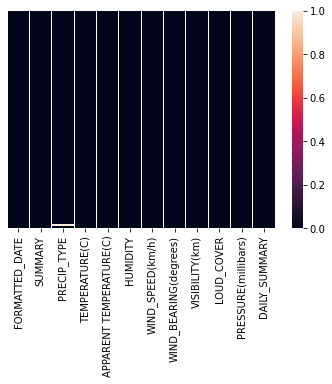

In [9]:
sns.heatmap(df.isnull(), yticklabels=False)

In [10]:
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
df

,FORMATTED_DATE,SUMMARY,PRECIP_TYPE,TEMPERATURE(C),APPARENT TEMPERATURE(C),HUMIDITY,WIND_SPEED(km/h),WIND_BEARING(degrees),VISIBILITY(km),LOUD_COVER,PRESSURE(millibars),DAILY_SUMMARY
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20,16.1000,0,1015.95,Partly cloudy starting in the morning.


In [11]:
df.isnull().sum()

FORMATTED_DATE             0
SUMMARY                    0
PRECIP_TYPE                0
TEMPERATURE(C)             0
APPARENT TEMPERATURE(C)    0
HUMIDITY                   0
WIND_SPEED(km/h)           0
WIND_BEARING(degrees)      0
VISIBILITY(km)             0
LOUD_COVER                 0
PRESSURE(millibars)        0
DAILY_SUMMARY              0
dtype: int64

<AxesSubplot:>

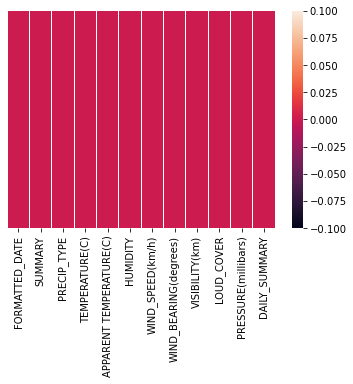

In [12]:
sns.heatmap(df.isnull(), yticklabels=False)

In [13]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
96448    False
96449    False
96450    False
96451    False
96452    False
Length: 96453, dtype: bool

In [14]:
df.duplicated().sum()

24

In [15]:
df = df.drop_duplicates()
df

,FORMATTED_DATE,SUMMARY,PRECIP_TYPE,TEMPERATURE(C),APPARENT TEMPERATURE(C),HUMIDITY,WIND_SPEED(km/h),WIND_BEARING(degrees),VISIBILITY(km),LOUD_COVER,PRESSURE(millibars),DAILY_SUMMARY
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20,16.1000,0,1015.95,Partly cloudy starting in the morning.


In [16]:
df.duplicated().sum()

0

In [17]:
df.describe()

,TEMPERATURE(C),APPARENT TEMPERATURE(C),HUMIDITY,WIND_SPEED(km/h),WIND_BEARING(degrees),VISIBILITY(km),LOUD_COVER,PRESSURE(millibars)
count,96429.000000,96429.000000,96429.000000,96429.000000,96429.000000,96429.000000,96429.0,96429.000000
mean,11.929692,10.851707,0.734902,10.812460,187.497506,10.347225,0.0,1003.232915
std,9.550492,10.695743,0.195466,6.913345,107.376423,4.192548,0.0,116.984300
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.683333,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [18]:
df.shape

(96429, 12)

In [19]:
df.pop("DAILY_SUMMARY")

0             Partly cloudy throughout the day.
1             Partly cloudy throughout the day.
2             Partly cloudy throughout the day.
3             Partly cloudy throughout the day.
4             Partly cloudy throughout the day.
                          ...                  
96448    Partly cloudy starting in the morning.
96449    Partly cloudy starting in the morning.
96450    Partly cloudy starting in the morning.
96451    Partly cloudy starting in the morning.
96452    Partly cloudy starting in the morning.
Name: DAILY_SUMMARY, Length: 96429, dtype: object

In [20]:
df

,FORMATTED_DATE,SUMMARY,PRECIP_TYPE,TEMPERATURE(C),APPARENT TEMPERATURE(C),HUMIDITY,WIND_SPEED(km/h),WIND_BEARING(degrees),VISIBILITY(km),LOUD_COVER,PRESSURE(millibars)
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51
...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,0,1014.36
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,0,1015.16
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,0,1015.66
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20,16.1000,0,1015.95


In [21]:
df.pop("LOUD_COVER")

0        0
1        0
2        0
3        0
4        0
        ..
96448    0
96449    0
96450    0
96451    0
96452    0
Name: LOUD_COVER, Length: 96429, dtype: int64

In [22]:
df

,FORMATTED_DATE,SUMMARY,PRECIP_TYPE,TEMPERATURE(C),APPARENT TEMPERATURE(C),HUMIDITY,WIND_SPEED(km/h),WIND_BEARING(degrees),VISIBILITY(km),PRESSURE(millibars)
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,1014.36
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,1015.16
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,1015.66
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20,16.1000,1015.95


In [23]:
df['SUMMARY'] = df['SUMMARY'].str.lower()
df

<ipython-input-23-7146012f9593>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SUMMARY'] = df['SUMMARY'].str.lower()


,FORMATTED_DATE,SUMMARY,PRECIP_TYPE,TEMPERATURE(C),APPARENT TEMPERATURE(C),HUMIDITY,WIND_SPEED(km/h),WIND_BEARING(degrees),VISIBILITY(km),PRESSURE(millibars)
0,2006-04-01 00:00:00.000 +0200,partly cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13
1,2006-04-01 01:00:00.000 +0200,partly cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63
2,2006-04-01 02:00:00.000 +0200,mostly cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94
3,2006-04-01 03:00:00.000 +0200,partly cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41
4,2006-04-01 04:00:00.000 +0200,mostly cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,partly cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,1014.36
96449,2016-09-09 20:00:00.000 +0200,partly cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,1015.16
96450,2016-09-09 21:00:00.000 +0200,partly cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,1015.66
96451,2016-09-09 22:00:00.000 +0200,partly cloudy,rain,21.522222,21.522222,0.60,10.5294,20,16.1000,1015.95


In [24]:
df.describe()

,TEMPERATURE(C),APPARENT TEMPERATURE(C),HUMIDITY,WIND_SPEED(km/h),WIND_BEARING(degrees),VISIBILITY(km),PRESSURE(millibars)
count,96429.000000,96429.000000,96429.000000,96429.000000,96429.000000,96429.000000,96429.000000
mean,11.929692,10.851707,0.734902,10.812460,187.497506,10.347225,1003.232915
std,9.550492,10.695743,0.195466,6.913345,107.376423,4.192548,116.984300
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.683333,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [25]:
max_thresholds = df['HUMIDITY'].quantile(0.90)
max_thresholds

0.95

In [26]:
min_thresholds = df['HUMIDITY'].quantile(0.030)
min_thresholds

0.32

In [27]:
df = df[(df['HUMIDITY']<max_thresholds) & (df['HUMIDITY']> min_thresholds)]

In [28]:
df

,FORMATTED_DATE,SUMMARY,PRECIP_TYPE,TEMPERATURE(C),APPARENT TEMPERATURE(C),HUMIDITY,WIND_SPEED(km/h),WIND_BEARING(degrees),VISIBILITY(km),PRESSURE(millibars)
0,2006-04-01 00:00:00.000 +0200,partly cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13
1,2006-04-01 01:00:00.000 +0200,partly cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63
2,2006-04-01 02:00:00.000 +0200,mostly cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94
3,2006-04-01 03:00:00.000 +0200,partly cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41
4,2006-04-01 04:00:00.000 +0200,mostly cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,partly cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,1014.36
96449,2016-09-09 20:00:00.000 +0200,partly cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,1015.16
96450,2016-09-09 21:00:00.000 +0200,partly cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,1015.66
96451,2016-09-09 22:00:00.000 +0200,partly cloudy,rain,21.522222,21.522222,0.60,10.5294,20,16.1000,1015.95


In [29]:
max_thresholds_pressure = df['PRESSURE(millibars)'].quantile(1)
max_thresholds_pressure

1046.38

In [30]:
min_thresholds_pressure = df['PRESSURE(millibars)'].quantile(0.0)
min_thresholds_pressure

0.0

In [31]:
df = df[(df['PRESSURE(millibars)']<=max_thresholds_pressure) & (df['PRESSURE(millibars)']> min_thresholds_pressure)]
df

,FORMATTED_DATE,SUMMARY,PRECIP_TYPE,TEMPERATURE(C),APPARENT TEMPERATURE(C),HUMIDITY,WIND_SPEED(km/h),WIND_BEARING(degrees),VISIBILITY(km),PRESSURE(millibars)
0,2006-04-01 00:00:00.000 +0200,partly cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13
1,2006-04-01 01:00:00.000 +0200,partly cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63
2,2006-04-01 02:00:00.000 +0200,mostly cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94
3,2006-04-01 03:00:00.000 +0200,partly cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41
4,2006-04-01 04:00:00.000 +0200,mostly cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,partly cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,1014.36
96449,2016-09-09 20:00:00.000 +0200,partly cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,1015.16
96450,2016-09-09 21:00:00.000 +0200,partly cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,1015.66
96451,2016-09-09 22:00:00.000 +0200,partly cloudy,rain,21.522222,21.522222,0.60,10.5294,20,16.1000,1015.95


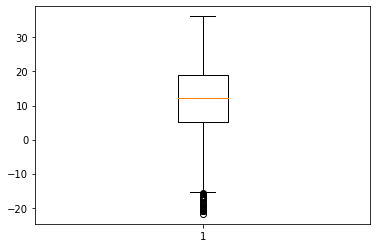

In [32]:
plt.boxplot(df["TEMPERATURE(C)"])
plt.show()

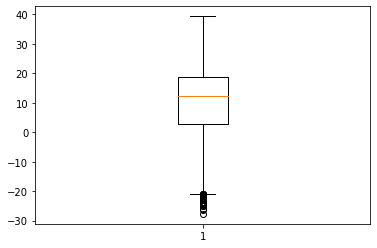

In [33]:
plt.boxplot(df["APPARENT TEMPERATURE(C)"])
plt.show()

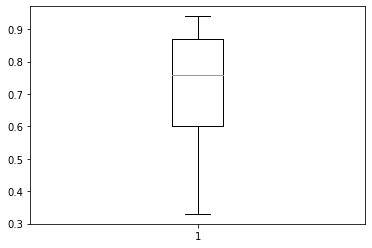

In [34]:
plt.boxplot(df["HUMIDITY"])
plt.show()

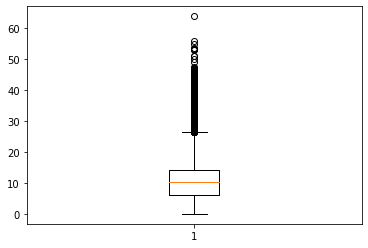

In [35]:
plt.boxplot(df["WIND_SPEED(km/h)"])
plt.show()

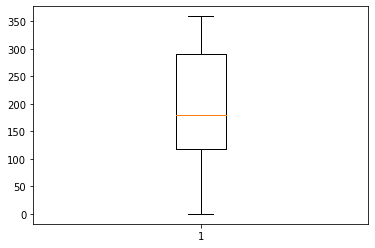

In [36]:
plt.boxplot(df["WIND_BEARING(degrees)"])
plt.show()

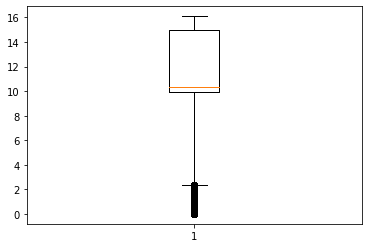

In [37]:
plt.boxplot(df["VISIBILITY(km)"])
plt.show()

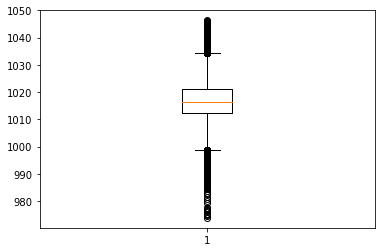

In [38]:
plt.boxplot(df["PRESSURE(millibars)"])
plt.show()

In [39]:
df.describe()

,TEMPERATURE(C),APPARENT TEMPERATURE(C),HUMIDITY,WIND_SPEED(km/h),WIND_BEARING(degrees),VISIBILITY(km),PRESSURE(millibars)
count,81903.000000,81903.000000,81903.000000,81903.000000,81903.000000,81903.000000,81903.000000
mean,12.156876,11.104890,0.723213,11.104323,188.075748,10.975072,1016.748484
std,9.197870,10.430033,0.170172,6.956838,107.421185,3.747148,7.657489
min,-21.822222,-27.716667,0.330000,0.000000,0.000000,0.000000,973.780000
25%,5.116667,2.911111,0.600000,6.150200,118.000000,9.917600,1012.140000
50%,12.222222,12.222222,0.760000,10.448900,180.000000,10.352300,1016.500000
75%,18.888889,18.888889,0.870000,14.312900,290.000000,14.956900,1021.000000
max,36.205556,39.344444,0.940000,63.852600,359.000000,16.100000,1046.380000


In [40]:
df.to_csv("data/final_sample.csv")

In [41]:
xx = pd.read_csv('data/final_sample.csv')

In [42]:
min_thresholds_temp = xx['TEMPERATURE(C)'].quantile(0.00075)
min_thresholds_temp

-14.363883332679999

In [43]:
xx = xx[(xx['TEMPERATURE(C)']> min_thresholds_temp)]

In [44]:
min_thresholds_app_temp = xx['APPARENT TEMPERATURE(C)'].quantile(0.0006)
min_thresholds_app_temp

-18.82431111264

In [45]:
xx = xx[(xx['APPARENT TEMPERATURE(C)']> min_thresholds_app_temp)]

In [46]:
max_thresholds_wind_speed = xx['WIND_SPEED(km/h)'].quantile(0.96)
max_thresholds_wind_speed

25.76

In [47]:
xx = xx[(xx['WIND_SPEED(km/h)']< max_thresholds_wind_speed)]

In [48]:
min_thresholds_visbilty = xx['VISIBILITY(km)'].quantile(0.03)
min_thresholds_visbilty

2.8175

In [49]:
xx = xx[(xx['VISIBILITY(km)']> min_thresholds_visbilty)]

In [50]:
max_thresholds_pressure = xx['PRESSURE(millibars)'].quantile(0.972)
max_thresholds_pressure

1032.49

In [51]:
min_thresholds_pressure = xx['PRESSURE(millibars)'].quantile(0.016)
min_thresholds_pressure

1000.3500000000001

In [52]:
xx = xx[(xx['PRESSURE(millibars)']<max_thresholds_pressure) & (xx['PRESSURE(millibars)']> min_thresholds_pressure)]

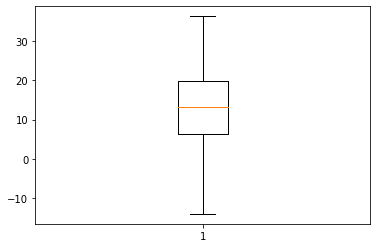

In [53]:
plt.boxplot(xx["TEMPERATURE(C)"])
plt.show()

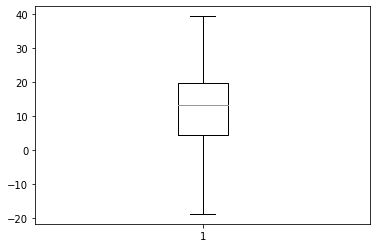

In [54]:
plt.boxplot(xx["APPARENT TEMPERATURE(C)"])
plt.show()

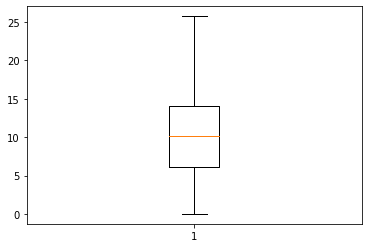

In [55]:
plt.boxplot(xx["WIND_SPEED(km/h)"])
plt.show()

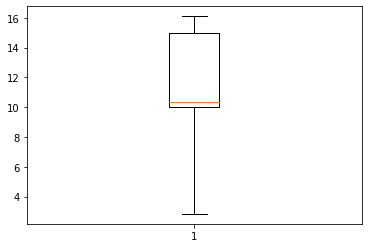

In [56]:
plt.boxplot(xx["VISIBILITY(km)"])
plt.show()

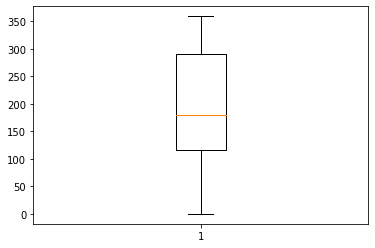

In [57]:
plt.boxplot(xx["WIND_BEARING(degrees)"])
plt.show()

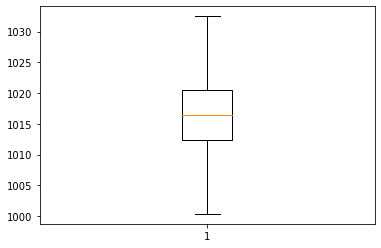

In [58]:
plt.boxplot(xx["PRESSURE(millibars)"])
plt.show()

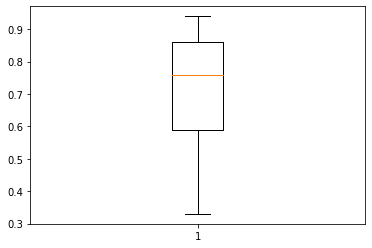

In [59]:
plt.boxplot(xx["HUMIDITY"])
plt.show()

In [60]:
xx.describe()

,Unnamed: 0,TEMPERATURE(C),APPARENT TEMPERATURE(C),HUMIDITY,WIND_SPEED(km/h),WIND_BEARING(degrees),VISIBILITY(km),PRESSURE(millibars)
count,72748.000000,72748.000000,72748.000000,72748.000000,72748.000000,72748.000000,72748.000000,72748.000000
mean,48227.145942,13.082224,12.175448,0.716177,10.391364,187.681833,11.370280,1016.537898
std,28056.701487,8.904501,10.073307,0.170447,5.710565,107.307054,3.359976,6.173050
min,0.000000,-13.927778,-18.794444,0.330000,0.000000,0.000000,2.833600,1000.360000
25%,23594.750000,6.238889,4.376389,0.590000,6.150200,116.000000,9.982000,1012.400000
50%,48302.500000,13.216667,13.216667,0.760000,10.207400,180.000000,10.352300,1016.420000
75%,72860.250000,19.827778,19.827778,0.860000,13.990900,290.000000,14.956900,1020.500000
max,96452.000000,36.205556,39.344444,0.940000,25.743900,359.000000,16.100000,1032.480000


In [61]:
df.describe()

,TEMPERATURE(C),APPARENT TEMPERATURE(C),HUMIDITY,WIND_SPEED(km/h),WIND_BEARING(degrees),VISIBILITY(km),PRESSURE(millibars)
count,81903.000000,81903.000000,81903.000000,81903.000000,81903.000000,81903.000000,81903.000000
mean,12.156876,11.104890,0.723213,11.104323,188.075748,10.975072,1016.748484
std,9.197870,10.430033,0.170172,6.956838,107.421185,3.747148,7.657489
min,-21.822222,-27.716667,0.330000,0.000000,0.000000,0.000000,973.780000
25%,5.116667,2.911111,0.600000,6.150200,118.000000,9.917600,1012.140000
50%,12.222222,12.222222,0.760000,10.448900,180.000000,10.352300,1016.500000
75%,18.888889,18.888889,0.870000,14.312900,290.000000,14.956900,1021.000000
max,36.205556,39.344444,0.940000,63.852600,359.000000,16.100000,1046.380000


In [1]:
xx.to_csv("data/final_data.csv")

NameError: name 'xx' is not defined

In [ ]:
data = pd.read_csv('data/final_data.csv')
data

In [ ]:
xx.describe(include=['object'])